# <span style="color: blue;">M3 Folium Map Launches and Dashboard</span>
* Dashboard: inputs - launch site (dropdown), payload (slider)
* Dashboard: outputs - pie chart All or by site, scatter plot All or by site/payload

## Lab 2: Dashboard
* 2 inputs (dropdown, slider) , 2 outputs (g.pie, g.scatter)
* downloaded df and used py to test, should always do before
* mapping c to c based on C, lambda(fail), straight py(All good)
* ... used alternative to np because np was not imported to dash

In [92]:
path = r"C:\Users\EngPh\OneDrive\Desktop\Data Science\C10 DS Capstone SpaceX\M3 Folium Maps and Dashboard\spacex_launch_dash.csv"
df=pd.read_csv(path)
df.head(3)

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0


In [98]:
df['Booster Version Category'].value_counts()

Booster Version Category
FT      24
v1.1    15
B4      11
v1.0     5
B5       1
Name: count, dtype: int64

In [94]:
df.groupby('Booster Version Category')['class'].sum().reset_index()

,Booster Version Category,class
0,B4,6
1,B5,1
2,FT,16
3,v1.0,0
4,v1.1,1


In [96]:
df.groupby('Booster Version Category')['class'].mean().reset_index()

,Booster Version Category,class
0,B4,0.545455
1,B5,1.000000
2,FT,0.666667
3,v1.0,0.000000
4,v1.1,0.066667


In [359]:
df['Launch Site'].value_counts()

Launch Site
CCAFS LC-40     26
KSC LC-39A      13
VAFB SLC-4E     10
CCAFS SLC-40     7
Name: count, dtype: int64

In [361]:
df['class'].value_counts()

class
0    32
1    24
Name: count, dtype: int64

In [363]:
df2 = df[df['Launch Site']=="CCAFS LC-40"]
df2.info

<bound method DataFrame.info of     Unnamed: 0  Flight Number  Launch Site  class  Payload Mass (kg)  \
0            0              1  CCAFS LC-40      0                0.0   
1            1              2  CCAFS LC-40      0                0.0   
2            2              3  CCAFS LC-40      0              525.0   
3            3              4  CCAFS LC-40      0              500.0   
4            4              5  CCAFS LC-40      0              677.0   
5            5              7  CCAFS LC-40      0             3170.0   
6            6              8  CCAFS LC-40      0             3325.0   
7            7              9  CCAFS LC-40      0             2296.0   
8            8             10  CCAFS LC-40      0             1316.0   
9            9             11  CCAFS LC-40      0             4535.0   
10          10             12  CCAFS LC-40      0             4428.0   
11          11             13  CCAFS LC-40      0             2216.0   
12          12             14  C

In [374]:
df['Outcome'] = df['class'].apply(lambda x: "Successful" if x = 1 else "Unsuccessful")
df.head(3)

SyntaxError: expected 'else' after 'if' expression (2642240177.py, line 1)

#### Handy: python mapping
* plotly charts are finnicky about changing data names vs changing traces names, so needed extra column

In [376]:
df['Outcome'] = df['class'].map({1: 'Successful', 0: 'Unsuccessful'})
df.head(3)

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category,Outcome
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0,Unsuccessful
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0,Unsuccessful
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0,Unsuccessful


#### Dash 
* 1st header didn't drop down unique values because had new 1st option set as ALL values
* Graph functions: 2 cases All data, or site data

Details:  
When grouping by count, can create "Count" column with reset_index()  
Mapped a new column directly with map() function, needed for legend name change display  
Did some name formatting with " {}".format()  
Group mean() and sum() functions work better with reset_index()  
Color options 3 ways: 1 would need color column, 2 didn't work, 3 direct (done here)  
Built conditional mask for DF in g.scatter function

#### Code for IBM Cloud IDE - based on Eclipse Theia open source

In [ ]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                # dcc.Dropdown(id='site-dropdown',...)
                                  dcc.Dropdown(id='site-dropdown',
                                              options=[
                                                  {'label': 'All Sites', 'value': 'ALL'},
                                                  {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                                                  {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                                                  {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                                                  {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
                                              ],
                                              value='ALL',
                                              placeholder="All Launch Sites",
                                              searchable=True
                                              ),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                #dcc.RangeSlider(id='payload-slider',...)
                                dcc.RangeSlider(id='payload-slider',
                                                min=0, max=10000, step=1000,                                                
                                                value=[min_payload, max_payload]),
                                html.Br(),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output

# Function decorator to specify function input and output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    # subset data
    site_df = spacex_df[spacex_df['Launch Site']==entered_site]
    site_df = site_df.groupby('class').size().reset_index(name='Count')
    # add column for labels
    site_df['Outcome'] = site_df['class'].map({1: 'Successful', 0: 'Unsuccessful'})
    # group totals
    All_df = spacex_df.groupby('Launch Site')['class'].sum().reset_index()
    if entered_site == 'ALL':
        fig = px.pie(All_df, values='class', 
        names='Launch Site', 
        title='Successful Landings by Launch Site')
        return fig
    else:
        fig = px.pie(site_df, values='Count', 
        names='Outcome',
        color_discrete_sequence = ['lightsteelblue','limegreen'], 
        title="Successful Landings at {}".format(entered_site))
        return fig
        # return the outcomes piechart for a selected site

# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output

@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
              [Input(component_id='site-dropdown', component_property='value'),Input(component_id='payload-slider', component_property='value')])

def get_scatter_chart(entered_site, entered_payload_range):
    site_df2 = spacex_df[spacex_df['Launch Site']==entered_site]
    All_df = spacex_df.groupby('Launch Site')['class'].sum().reset_index()
    if entered_site == 'ALL':
        low, high = entered_payload_range
        mask = (spacex_df['Payload Mass (kg)'] > low) & (spacex_df['Payload Mass (kg)'] < high)
        fig = px.scatter(spacex_df[mask], x="Payload Mass (kg)", y="class", color="Booster Version Category",
                         hover_data=['Payload Mass (kg)'], title='Launch Success by Payload and Booster')
        return fig
    else:
        low, high = entered_payload_range
        mask = (site_df2['Payload Mass (kg)'] > low) & (site_df2['Payload Mass (kg)'] < high)
        fig = px.scatter(site_df2[mask], x="Payload Mass (kg)", y="class", color="Booster Version Category",
                         hover_data=['Payload Mass (kg)'], title="Launch Success at {} by Payload and Booster".format(entered_site))
        return fig


# Run the app
if __name__ == '__main__':
    app.run_server()


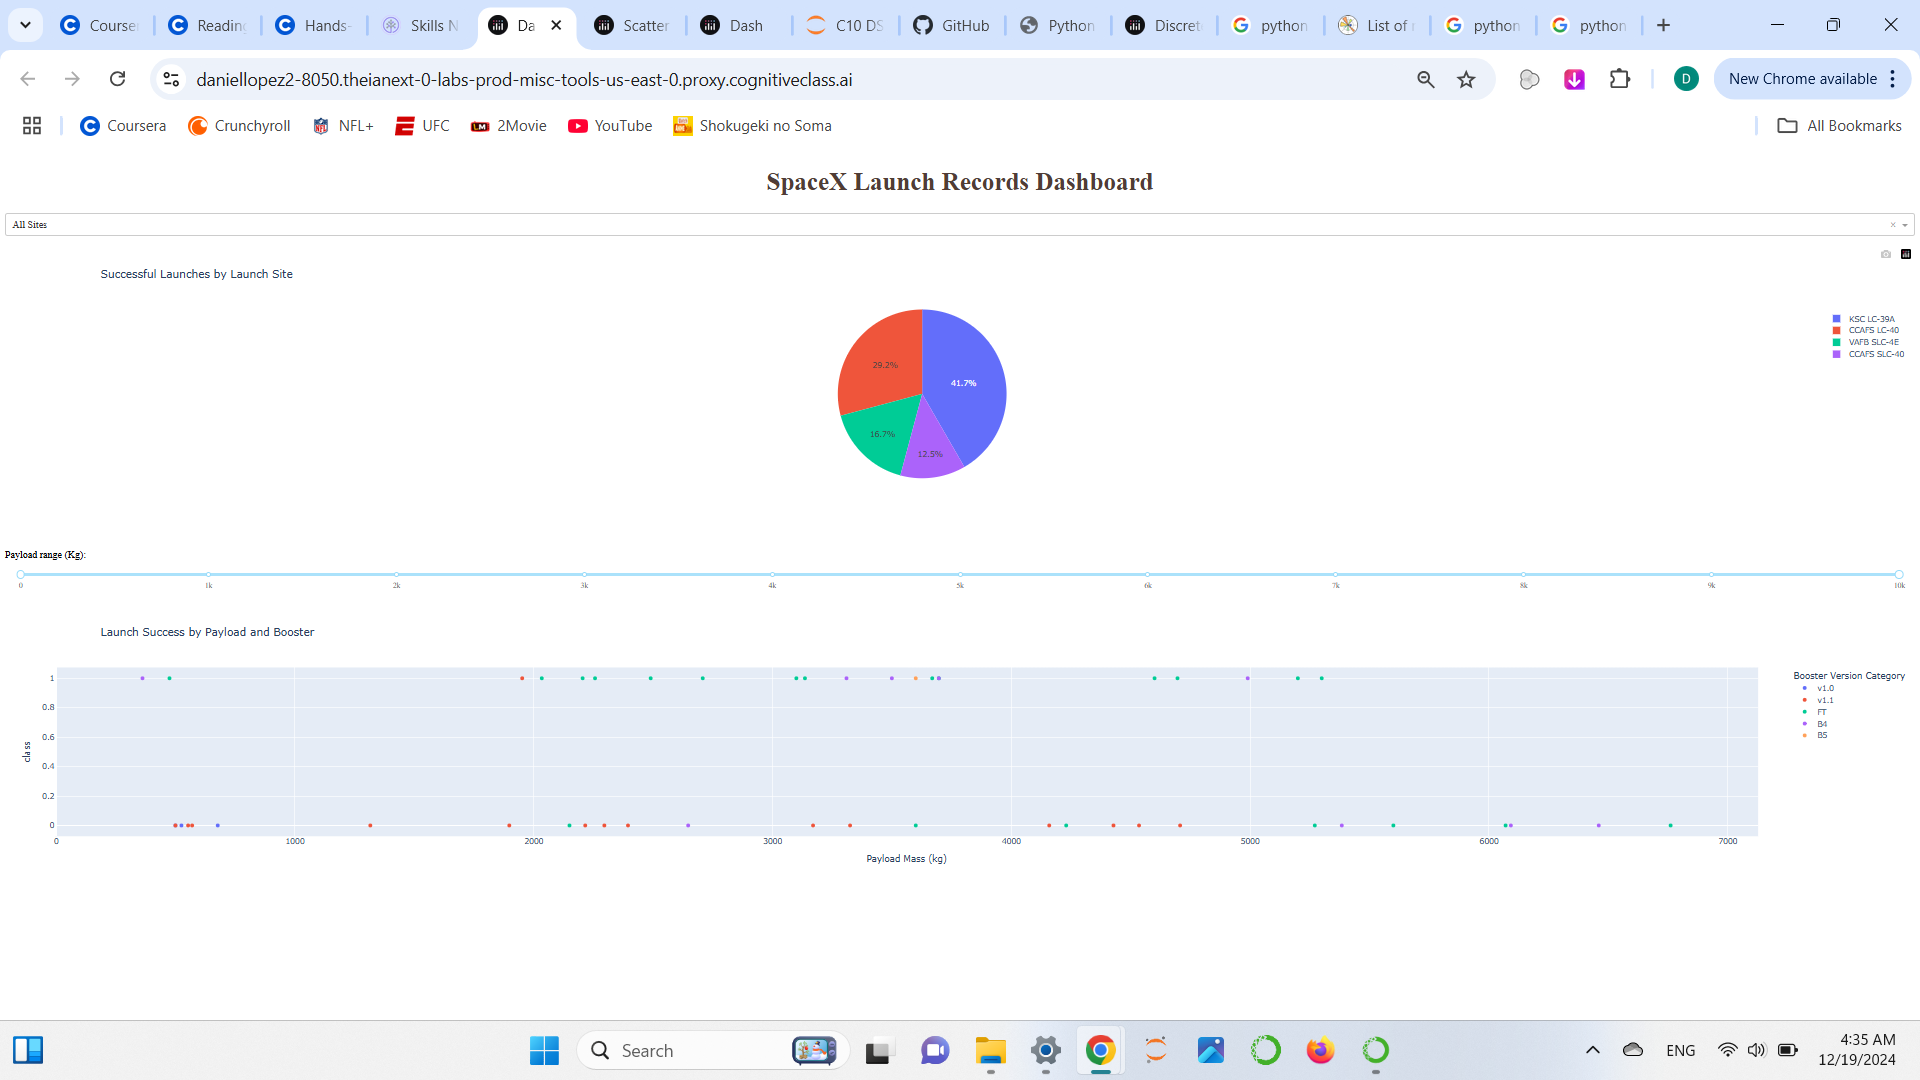

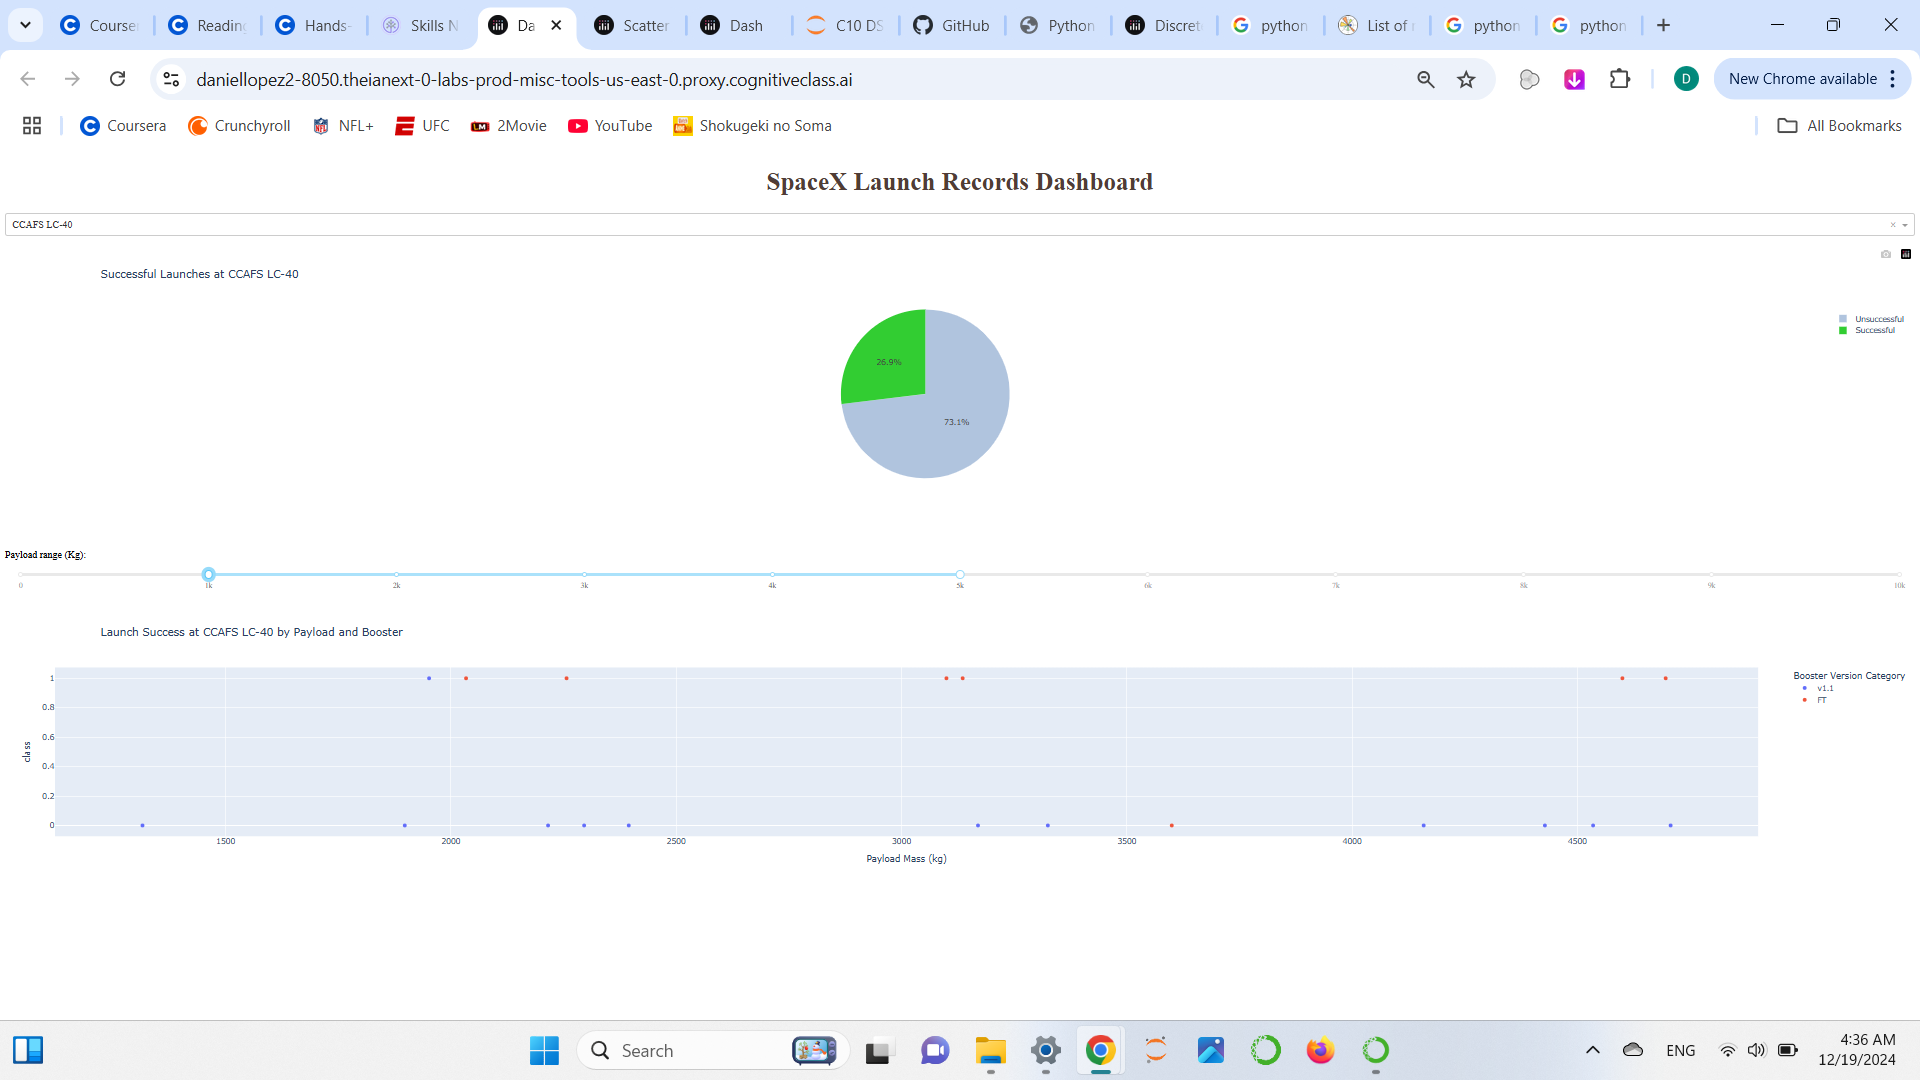